<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [5]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 176.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 209.8 MB/s eta 0:00:00


In [6]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 139.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 131.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 157.5 MB/s eta 0:00:00


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [8]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [9]:
## Write your code here

# Count duplicate rows
print("Duplicate rows before removal:", df.duplicated().sum())

# Preview duplicate rows
df[df.duplicated()].head()
# duplicates_preview = df[df.duplicated()]
# print(duplicates_preview)

# Remove duplicates
df = df.drop_duplicates()

# Verify removal
print("Duplicate rows after removal:", df.duplicated().sum())


Duplicate rows before removal: 0
Duplicate rows after removal: 0


In [10]:
# ## Write your code here
# # 1. Count the number of duplicate rows
# df.duplicated().sum()

# # 2. Display the first few duplicate rows
# df[df.duplicated()].head()

# # 3. Remove duplicates (even though Task 1 showed there are none)
# df = df.drop_duplicates()

# # 4. Verify removal by counting duplicates again
# duplicates_after = df.duplicated().sum()

# print("Number of duplicate rows after removal:", duplicates_after)


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [11]:
## Write your code here
# Identify and handle missing values in CodingActivities
# 1. Count missing values in the column
missing_CodingActivities = df['CodingActivities'].isnull().sum()
print("Number of missing rows in 'CodingActivities':", missing_CodingActivities)

# 2. Identify the most frequent value in a column with many missing values (e.g., CodingActivies)
value_counts = df['CodingActivities'].value_counts()
print("\nMost frequent values in 'CodingActivities':\n", value_counts)

most_frequent_value = df['CodingActivities'].mode()[0]
print("\nMost frequent value selected for imputation:", most_frequent_value)


Number of missing rows in 'CodingActivities': 10971

Most frequent values in 'CodingActivities':
 CodingActivities
Hobby                                                                                                                                                                              9993
I don’t code outside of work                                                                                                                                                       6508
Hobby;Professional development or self-paced learning from online courses                                                                                                          6203
Hobby;Contribute to open-source projects                                                                                                                                           3732
Professional development or self-paced learning from online courses                                                                                  

##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [12]:
## Write your code here
# Impute missing values in CodingActivities with forward-fill

df['CodingActivities'] = df['CodingActivities'].ffill()

# Verify
print("Missing values in 'CodingActivities' after forward-fill:",
      df['CodingActivities'].isnull().sum())

# Show updated distribution
print("\nUpdated value counts for 'CodingActivities':\n")
print(df['CodingActivities'].value_counts())

# # Check to confirm the effect
# df['CodingActivities'].value_counts()


Missing values in 'CodingActivities' after forward-fill: 0

Updated value counts for 'CodingActivities':

CodingActivities
Hobby                                                                                                                                                                              11972
I don’t code outside of work                                                                                                                                                        7762
Hobby;Professional development or self-paced learning from online courses                                                                                                           7405
Hobby;Contribute to open-source projects                                                                                                                                            4469
Professional development or self-paced learning from online courses                                                                      

**Forward‑fill is useful when**:
- the column represents sequential or survey‑style responses
- missing values likely follow the same pattern as the previous entry

**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [13]:
## Write your code here
comp_cols = [col for col in df.columns if 'Comp' in col or 'Salary' in col or 'Pay' in col]
print("Compensation-related columns:", comp_cols)


Compensation-related columns: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [14]:
## Write your code here
df['ConvertedCompYearly_MinMax'] = (
    (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) /
    (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())
)


In [23]:
# Vrifying to confirm Min-Max Normalization
# print(df['ConvertedCompYearly_MinMax'].head())
# # df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head()
# df['ConvertedCompYearly_MinMax'].describe()


In [22]:
# Vrifying to confirm Min-Max Normalization
print(df['ConvertedCompYearly_MinMax'].head())

print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())

print(df['ConvertedCompYearly_MinMax'].describe())


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: ConvertedCompYearly_MinMax, dtype: float64
   ConvertedCompYearly  ConvertedCompYearly_MinMax
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN
count    23435.000000
mean         0.005300
std          0.011488
min          0.000000
25%          0.002012
50%          0.003998
75%          0.006642
max          1.000000
Name: ConvertedCompYearly_MinMax, dtype: float64


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [24]:
## Write your code here
# Apply Z-score Normalization to ConvertedCompYearly

df['ConvertedCompYearly_Zscore'] = (
    (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()) /
    df['ConvertedCompYearly'].std()
)

# Verify the new column
print(df['ConvertedCompYearly_Zscore'].head())
print(df['ConvertedCompYearly_Zscore'].describe())


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: ConvertedCompYearly_Zscore, dtype: float64
count    2.343500e+04
mean     1.637265e-17
std      1.000000e+00
min     -4.613176e-01
25%     -2.861649e-01
50%     -1.132771e-01
75%      1.168161e-01
max      8.658551e+01
Name: ConvertedCompYearly_Zscore, dtype: float64


Z‑score normalization for **ConvertedCompYearly** follows a simple formula:
$$
Z = \frac{x - \mu}{\sigma}
$$
where  
- $x$ is the original value  
- $\mu$ is the column mean  
- $\sigma$ is the standard deviation  

This produces a standardized column with mean 0 and standard deviation 1.

### What you should expect
- The **mean** in the `.describe()` output will be very close to **0**  
- The **std** will be very close to **1**  
- Values far above the mean salary become large positive Z‑scores  
- Values far below the mean become negative Z‑scores  

This prepares the data for any model or visualization that benefits from standardized scales.

### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


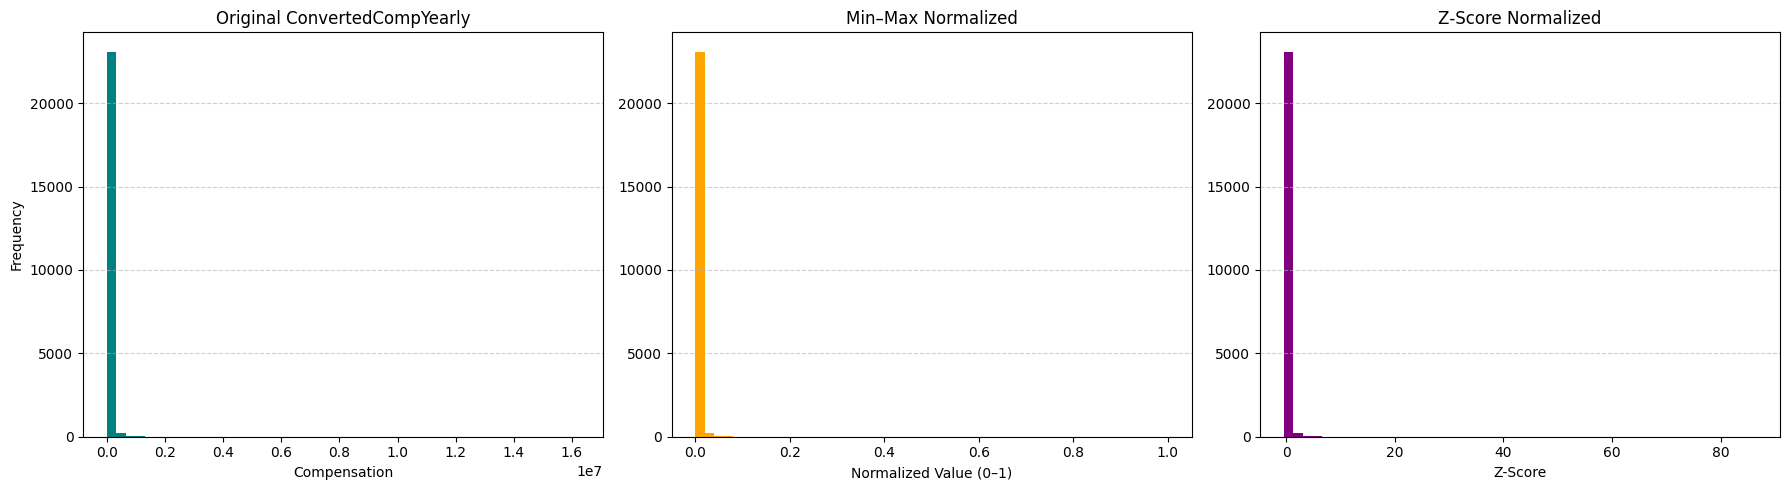

In [29]:
## Write your code here
# Visualize original and normalized compensation distributions

plt.figure(figsize=(18, 5))

# Original
plt.subplot(1, 3, 1)
plt.hist(df['ConvertedCompYearly'], bins=50, color='teal')
plt.title("Original ConvertedCompYearly")
plt.xlabel("Compensation")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Min–Max Normalized
plt.subplot(1, 3, 2)
plt.hist(df['ConvertedCompYearly_MinMax'], bins=50, color='orange')
plt.title("Min–Max Normalized")
plt.xlabel("Normalized Value (0–1)")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Z‑Score Normalized
plt.subplot(1, 3, 3)
plt.hist(df['ConvertedCompYearly_Zscore'], bins=50, color='purple')
plt.title("Z‑Score Normalized")
plt.xlabel("Z‑Score")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [30]:
# import matplotlib.pyplot as plt

# # --- Setup the Subplots (1 row, 3 columns) ---
# fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# # 1. Original Data: ConvertedCompYearly
# axes[0].hist(df['ConvertedCompYearly'], bins=30, color='skyblue', edgecolor='black')
# axes[0].set_title('Original Data\n(ConvertedCompYearly)', fontsize=14)
# axes[0].set_xlabel('Salary (USD)')
# axes[0].set_ylabel('Frequency')

# # 2. Min-Max Normalized: ConvertedCompYearly_MinMax
# axes[1].hist(df['ConvertedCompYearly_MinMax'], bins=30, color='salmon', edgecolor='black')
# axes[1].set_title('Min-Max Normalized\n(ConvertedCompYearly_MinMax)', fontsize=14)
# axes[1].set_xlabel('Normalized Value (0 to 1)')

# # 3. Z-score Standardized: ConvertedCompYearly_Zscore
# axes[2].hist(df['ConvertedCompYearly_Zscore'], bins=30, color='lightgreen', edgecolor='black')
# axes[2].set_title('Z-score Standardized\n(ConvertedCompYearly_Zscore)', fontsize=14)
# axes[2].set_xlabel('Z-score (Mean=0)')

# # Add gridlines for readability
# for ax in axes:
#     ax.grid(axis='y', linestyle='--', alpha=0.6)

# plt.tight_layout()
# plt.show()


**What the plots show** and **why normalization didn’t change the shape** of the distribution.

#### Notes on the Visualization of Normalized Compensation Data

The three histograms show how different normalization techniques affect the scale of `ConvertedCompYearly` while preserving the underlying distribution.

- The **original compensation data** is heavily right‑skewed, with most values concentrated near the lower end and a long tail of high earners.
- **Min–Max normalization** rescales all values into the 0–1 range. The shape remains the same because Min–Max only compresses or stretches the scale; it does not change the distribution.
- **Z‑score normalization** centers the data around a mean of 0 with a standard deviation of 1. The distribution is still right‑skewed, but now values are expressed in terms of how many standard deviations they are from the mean.

Adding gridlines makes it easier to compare frequencies across the three plots and visually confirm that normalization changes **scale**, not **shape**.

Takeaway:

> Normalization standardizes the scale of compensation values but does not remove skewness or outliers.

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
